In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Taylor expansion of exponential function

In [2]:
def expTaylor(x,x0,nmax):
    t = 0
    for n in range(nmax+1):
        t = t + np.exp(x0) * (x-x0)**n / np.math.factorial(n)
    return t

In [3]:
expTaylor(1,0,10)

2.7182818011463845

In [4]:
np.exp(1)

2.718281828459045

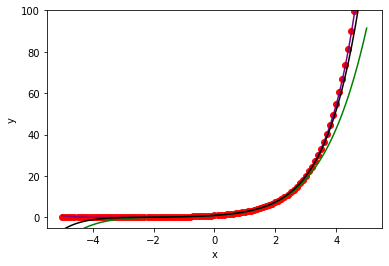

In [5]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])

x_list = np.linspace(-5,5,101)
nmax = 10
nmax1 = 5
nmax2 = 7
plt.scatter(x_list, np.exp(x_list), c='red')
plt.plot(x_list, expTaylor(x_list,0,nmax), c='purple')
plt.plot(x_list, expTaylor(x_list,0,nmax1), c='green')
plt.plot(x_list, expTaylor(x_list,0,nmax2), c='black')

# Taylor expansion of Sine function

In [6]:
def sinTaylor(x,nmax):
    t = 0
    for n in range(nmax+1):
        t = t + (-1)**n * (x)**(2*n + 1)/ np.math.factorial(2*n + 1)
    return t

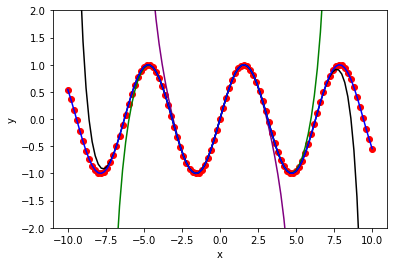

In [7]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-10,10,101)
nmax = 3
nmax1 = 6
nmax2 = 9
nmax3 = 18
plt.scatter(x_list, np.sin(x_list), c='red')
plt.plot(x_list, sinTaylor(x_list,nmax), c='purple')
plt.plot(x_list, sinTaylor(x_list,nmax1), c='green')
plt.plot(x_list, sinTaylor(x_list,nmax2), c='black')
plt.plot(x_list, sinTaylor(x_list,nmax3), c='blue') # Blue curve almost fits the data points

In [8]:
np.sin(10.5)-sinTaylor(10.5,20) # almost negligible

-1.2777728874979744e-09

# Numerically calculating higher derivatives

In [9]:
def derivative(f,x,h):
    return (f(x+h) - f(x))/ h

In [10]:
def func(x):
    return 2*np.sin(x)**2 + x

In [11]:
x0 = 10.5
h = 0.0001

In [12]:
func(x0)

12.04772926022427

In [13]:
derivative(func,x0,h)

2.6732017200536973

In [14]:
def nderivative(f,x,h,n):
    t = 0
    for k in range(n+1):
        t = t + (-1)**(k+n) * np.math.factorial(n)/ np.math.factorial(n-k)*np.math.factorial(k) * f(x + k*h)
    return t/ h**n

In [15]:
nderivative(func,x0,h,0)

12.04772926022427

In [16]:
nderivative(func,x0,h,1)

2.6732017200536973

In [17]:
nderivative(func,x0,h,2)

3614479161.4041386

# Taylor Expansion of general function

In [18]:
def Taylor(f,x,x0,nmax,h):
    t = 0
    for n in range(nmax+1):
        t = t + nderivative(f,x0,h,n) * (x-x0)**n / np.math.factorial(n)
    return t

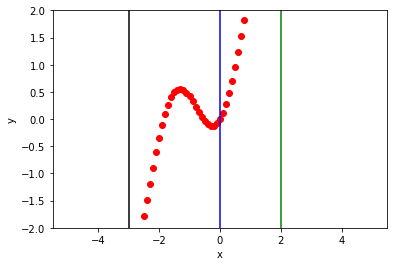

In [19]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])

x_list = np.linspace(-5,5,101)
nmax = 5
h = 0.001
plt.scatter(x_list, func(x_list), c='red')
plt.plot(x_list, Taylor(func,x_list,0, nmax,h), c='blue')
plt.plot(x_list, Taylor(func,x_list,2, nmax,h), c='green')
plt.plot(x_list, Taylor(func,x_list,-3, nmax,h), c='k')

In [20]:
func(x_list)

array([-3.16092847, -2.96957373, -2.81531214, -2.70030696, -2.62515638,
       -2.58886974, -2.58890699, -2.62127995, -2.68071135, -2.76084514,
       -2.85449997, -2.95395542, -3.05125984, -3.13854733, -3.20835131,
       -3.25390225, -3.26939749, -3.25023259, -3.19318492, -3.0965421 ,
       -2.96017029, -2.78551952, -2.57556588, -2.33469288, -2.06851667,
       -1.78366219, -1.48749898, -1.18784747, -0.89266713, -0.60973918,
       -0.34635638, -0.10903229,  0.09675842,  0.26679819,  0.39829478,
        0.4899925 ,  0.54222234,  0.55688875,  0.53739372,  0.48850112,
        0.41614684,  0.32720209,  0.22919952,  0.13003286,  0.03764225,
       -0.04030231, -0.09670671, -0.12533561, -0.12106099, -0.08006658,
        0.        ,  0.11993342,  0.27893901,  0.47466439,  0.70329329,
        0.95969769,  1.23764225,  1.53003286,  1.82919952,  2.12720209,
        2.41614684,  2.68850112,  2.93739372,  3.15688875,  3.34222234,
        3.4899925 ,  3.59829478,  3.66679819,  3.69675842,  3.69

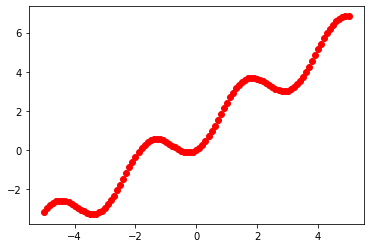

In [21]:
plt.scatter(x_list, func(x_list), c='red')
#plt.plot(x_list, Taylor(func,x_list,0, nmax,h), c='blue')

# Interpolation

## Generate data points

In [22]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [23]:
npoints = 21
x_list = np.linspace(-5,5,21)
data0 = np.array([x_list, correctFunction(x_list)])

In [24]:
data0.shape

(2, 21)

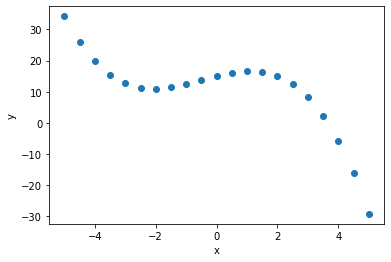

In [25]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1])

modify x and y values by adding random numbers

In [26]:
0.1*(2*(np.random.rand(npoints))-1)

array([-0.07232437,  0.02006344, -0.08502919, -0.02581571, -0.05260547,
        0.06199065, -0.05667277, -0.08826212, -0.01404979, -0.08625864,
       -0.07811546,  0.02449962,  0.03835266, -0.09426892,  0.01406798,
        0.07092395,  0.04281339,  0.04099534, -0.03995043,  0.05583357,
        0.09815957])

In [27]:
data = np.array([data0[0] + 0.25*(2*(np.random.rand(npoints))-1), data0[1] + 5.0*(2*(np.random.rand(npoints))-1)])

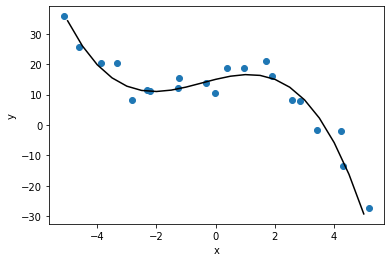

In [28]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0],data[1])
plt.plot(data0[0],data0[1], 'k')

## Spline Interpolation

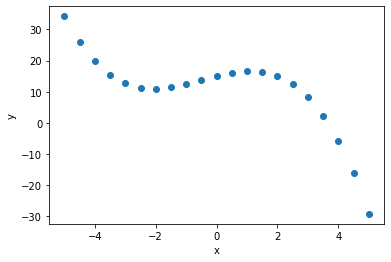

In [29]:
# Unperturbed Data
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1])

In [30]:
from scipy import interpolate

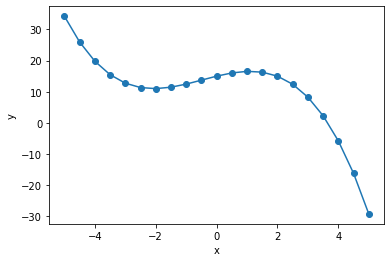

In [31]:
# linear splines

splineLinear0 = interpolate.interp1d(data0[0], data0[1], kind = 'linear')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

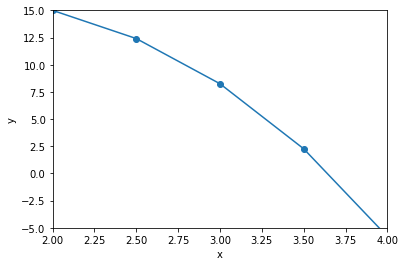

In [32]:
# zoom
plt.xlabel('x')
plt.ylabel('y')

plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0],data0[1])
plt.plot(data0[0], splineLinear0(data0[0]))

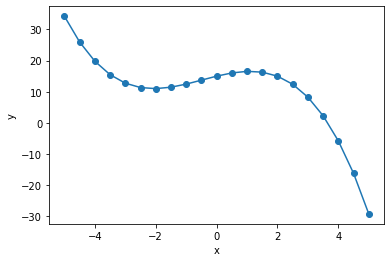

In [33]:
# cubic spline
splineCubic0 = interpolate.interp1d(data0[0],data0[1],kind = 'cubic')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0],data0[1])
plt.plot(data0[0], splineCubic0(data0[0]))

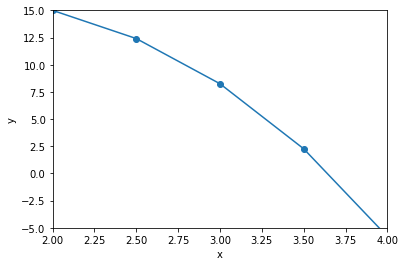

In [34]:
# zoom
plt.xlabel('x')
plt.ylabel('y')

plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0],data0[1])
plt.plot(data0[0], splineCubic0(data0[0]))

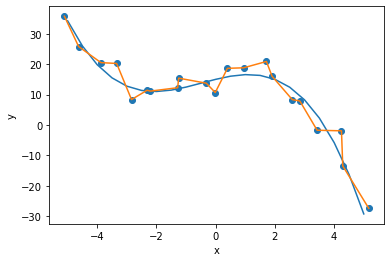

In [35]:
# Perturbed Data
splineCubic = interpolate.interp1d(data[0],data[1], kind = 'cubic')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data0[0],data0[1])
plt.scatter(data[0],data[1])
plt.plot(data[0], splineCubic(data[0]))

How to handle data which is not smooth ?

In [36]:
splineSmooth = interpolate.UnivariateSpline(data[0],data[1])
splineSmooth.set_smoothing_factor(500)

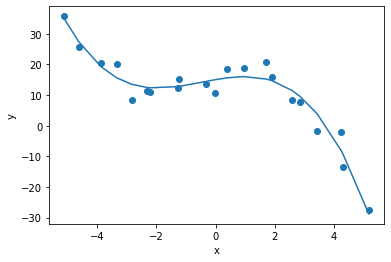

In [37]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0],data[1])
plt.plot(data[0], splineSmooth(data[0]))

# Fitting a model function

In [38]:
def polynomialModel(x,a):
    t = 0
    for k in range(len(a)):
        t = t + a[k] * x**k
    return t

In [39]:
a0 = np.array([15,2.4,-0.5,-0.35])

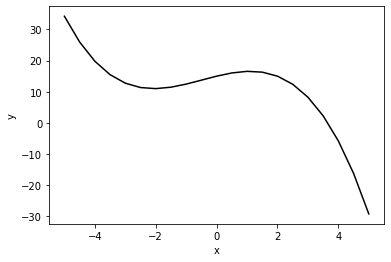

In [40]:
x_list = np.linspace(-5,5,npoints)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_list, polynomialModel(x_list,a0), 'k')

## Define Error

In [41]:
data.shape

(2, 21)

In [42]:
def errorFit(f,coefficients,data):
    error = 0
    for i in range(len(data[0])):
        error = error + (data[1,i] - f(data[0,i], coefficients))**2
        
    return error

In [43]:
errorFit(polynomialModel, a0, data)

293.14545956400923

## Gradient Descent (update coefficients to reduce the error)

In [44]:
def errorfitGradient(f,coefficients,data):
    return np.array([-2*np.sum(np.array([(data[1,i] - f(data[0,i],coefficients))*data[0,i]**k
                                       for i in range(len(data[0]))])) for k in range(len(coefficients))])

In [45]:
errorfitGradient(polynomialModel,a0,data)

array([  -29.344716  ,   -74.16375182,  -475.12738743, -2453.9435266 ])

## Loop for the actual fitting

In [46]:
iterations = 10000
h = 0.00001
a = 2*np.random.rand(4)-1

for i in range(iterations):
    a = a - h*errorfitGradient(polynomialModel,a,data)

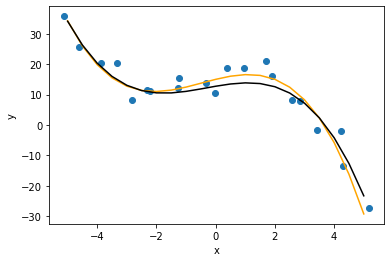

In [47]:
x_list = np.linspace(-5,5,npoints)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_list, polynomialModel(x_list,a0), 'orange')
plt.plot(x_list, polynomialModel(x_list,a), 'k')
plt.scatter(data[0], data[1])

In [48]:
print(errorFit(polynomialModel, a, data))
print(errorFit(polynomialModel, a0, data))

289.72605291466147
293.14545956400923


In [49]:
print(a)
print(a0)

[12.73222782  1.69546514 -0.29312762 -0.29741978]
[15.    2.4  -0.5  -0.35]
